## Sampling

In [1]:
import numpy as np
import pandas as pd
df_sample=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['type'])
label
df_sample.drop("type", axis=1, inplace=True)
df_sample["type"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameDest'])
label
df_sample.drop("nameDest", axis=1, inplace=True)
df_sample["nameDest"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameOrig'])
label
df_sample.drop("nameOrig", axis=1, inplace=True)
df_sample["nameOrig"] = label

In [3]:
X = df_sample.drop('isFraud', axis=1)
# Separate the target variable
y = df_sample['isFraud']

In [4]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# #Upsampling via SMOTE
# smote = SMOTE(sampling_strategy=0.2, random_state=0)

# #Downsample via RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy=0.4, random_state=0)

# #Application of the resampling methods
# X_resampled, y_resampled = smote.fit_resample(X, y)
# X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [5]:
from imblearn.over_sampling import SMOTE

#Upsampling via SMOTE
smote = SMOTE(sampling_strategy=0.55, random_state=0)

# Fit and apply the resampler to the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [6]:
# assuming your dataframe is named df_sample
amount_min = df_sample['amount'].min()
amount_max = df_sample['amount'].max()

print("Minimum amount:", amount_min)
print("Maximum amount:", amount_max)

Minimum amount: 0.0
Maximum amount: 69886731.3


In [7]:
counts = y_resampled.value_counts()
print(counts)

0    699120
1    384516
Name: isFraud, dtype: int64


In [8]:
# combine X_resampled and y_resampled back to a dataframe
df_sample = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['isFraud'])], axis=1)

Nominal dataframe

In [9]:
# Count the number of occurrences of 0 and 1
counts = df_sample['isFraud'].value_counts()

# Print the counts
print("Number of 0s:", counts[0])
print("Number of 1s:", counts[1])

Number of 0s: 699120
Number of 1s: 384516


In [ ]:
from sklearn.cluster import KMeans

# Select continuous variables along with
continuous_vars = ['step','amount','isFraud']

# Normalize the data
normalized_df = (df_sample[continuous_vars] - df_sample[continuous_vars].mean()) / df_sample[continuous_vars].std()

# Determine optimal number of clusters
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 50, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(normalized_df)
    sse.append(kmeans.inertia_)
    
# Elbow method 
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(normalized_df)
clusters = kmeans.predict(normalized_df)

# Assign nominal values
cluster_df = pd.DataFrame()
for var in continuous_vars:
    cluster_centers = kmeans.cluster_centers_[:, continuous_vars.index(var)]
    col_name = var + '_cluster'
    cluster_df[col_name] = kmeans.predict(normalized_df)
    
    # Replace cluster labels with desired values
    if var == 'isFraud':
        cluster_df[col_name] = cluster_df[col_name].apply(lambda x: 'Fraud' if x == 1 else 'No fraud')
    elif var == 'amount':
        cluster_labels = ['Low', 'Medium', 'High']
        normalized_df['amount_bin'], bin_edges = pd.qcut(normalized_df['amount'], q=3, labels=cluster_labels, retbins=True)
        cluster_df[col_name] = normalized_df['amount_bin']
        print(f"The bin edges for amount are {bin_edges}")
        normalized_df = normalized_df.drop(['amount_bin'], axis=1)
    elif var == 'step':
        bin_edges = [-np.inf, 186, 372, 558, np.inf] # Divide into four bins based on quartiles
        cluster_labels = ['1-186', '187-372', '373-558', '559-743']
        cluster_df[col_name] = pd.cut(df_sample['step'], bins=bin_edges, labels=cluster_labels)
        print(f"The bin edges for step are {bin_edges}")
        
new_df1 = pd.DataFrame()
# Merge nominal variables with original dataset
new_df1 = pd.concat([new_df1, cluster_df], axis=1)

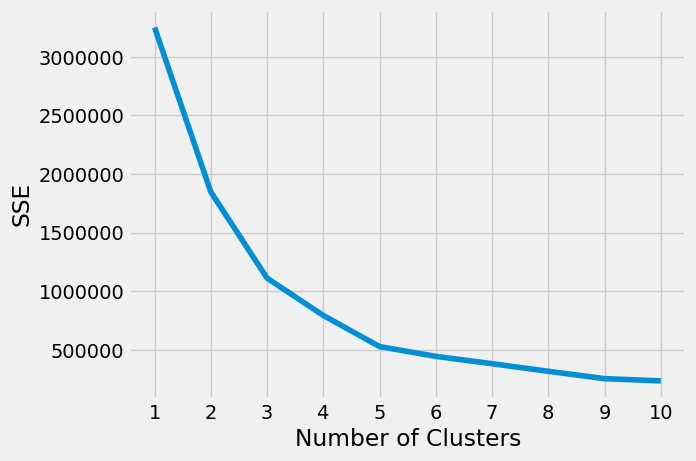

The bin edges for step are [-inf, 186, 372, 558, inf]
The bin edges for amount are [0, 50000, 100000, 500000, 1000000, 5000000, 10000000, 60000000, 80000000]


In [14]:
from sklearn.cluster import KMeans

# Select continuous variables along with
continuous_vars = ['step','amount','isFraud']

# Normalize the data
normalized_df = (df_sample[continuous_vars] - df_sample[continuous_vars].mean()) / df_sample[continuous_vars].std()

# Determine optimal number of clusters
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 50, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(normalized_df)
    sse.append(kmeans.inertia_)
    
# Elbow method 
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(normalized_df)
clusters = kmeans.predict(normalized_df)

# Assign nominal values
cluster_df = pd.DataFrame()
for var in continuous_vars:
    cluster_centers = kmeans.cluster_centers_[:, continuous_vars.index(var)]
    col_name = var + '_cluster'
    cluster_df[col_name] = kmeans.predict(normalized_df)
#     bins=[0,50000, 100000, 500000, 1000000, 5000000, 10000000,60000000,80000000]
    
    # Replace cluster labels with desired values
    if var=='amount':
#         bin_edges = [0,50000, 1000000, 5000000, 10000000,50000000,100000000, 600000000, 800000000]
#         cluster_labels = ['0-50k', '50k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M','10M-60M','60M-80M']
        bin_edges = [0, 50000, 100000, 500000, 1000000, 5000000, 10000000, 60000000, 80000000]
        cluster_labels = ['0-50k', '50k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-60M', '60M-80M']
        cluster_df[col_name] = pd.cut(df_sample['amount'], bins=bin_edges, labels=cluster_labels)
        print(f"The bin edges for amount are {bin_edges}")
#     
    elif var == 'step':
        bin_edges = [-np.inf, 186, 372, 558, np.inf] # Divide into four bins based on quartiles
        cluster_labels = ['1-186', '187-372', '373-558', '559-743']
        cluster_df[col_name] = pd.cut(df_sample['step'], bins=bin_edges, labels=cluster_labels)
        print(f"The bin edges for step are {bin_edges}")
        
new_df1 = pd.DataFrame()

# Merge nominal variables with original dataset
new_df1 = pd.concat([new_df1, cluster_df], axis=1)

In [15]:
new_df1.head(20)

,step_cluster,amount_cluster,isFraud_cluster
0,187-372,100k-500k,2
1,1-186,100k-500k,2
2,187-372,0-50k,2
3,187-372,0-50k,2
4,187-372,100k-500k,2
5,1-186,100k-500k,2
6,187-372,100k-500k,2
7,1-186,0-50k,2
8,187-372,0-50k,2
9,559-743,100k-500k,2


In [ ]:
# Count number of times No fraud occurs in 'isFraud_cluster'
no_fraud_count = new_df1['isFraud_cluster'].value_counts()['No fraud']

# Print the count
print("Number of times 'No fraud' occurs in 'isFraud_cluster':", no_fraud_count)

In [ ]:
# Count number of times No fraud occurs in 'isFraud_cluster'
no_fraud_count = new_df1['isFraud_cluster'].value_counts()['Fraud']

# Print the count
print("Number of times 'No fraud' occurs in 'isFraud_cluster':", no_fraud_count)

In [ ]:
cluster_df['amount_cluster'].value_counts()

 np.percentile function to create bins based on percentiles of the amount variable.

In [ ]:
# Determine range of values for "Low" bin
low_bin = pd.Interval(left=kmeans.cluster_centers_[0, continuous_vars.index('amount')] - normalized_df['amount'].std(),
                      right=kmeans.cluster_centers_[0, continuous_vars.index('amount')] + normalized_df['amount'].std())
print(low_bin)

In [ ]:
# Determine range of values for "Medium" bin
medium_bin = pd.Interval(left=kmeans.cluster_centers_[1, continuous_vars.index('amount')] - normalized_df['amount'].std(),
                         right=kmeans.cluster_centers_[1, continuous_vars.index('amount')] + normalized_df['amount'].std())
print(medium_bin)

# Determine range of values for "High" bin
high_bin = pd.Interval(left=kmeans.cluster_centers_[2, continuous_vars.index('amount')] - normalized_df['amount'].std(),
                       right=kmeans.cluster_centers_[2, continuous_vars.index('amount')] + normalized_df['amount'].std())
print(high_bin)

In [ ]:
# import pandas as pd

# # One-hot encode the categorical columns
# df_encoded = pd.get_dummies(new_df1, prefix='', prefix_sep='')

# # Concatenate the binary columns
# df_boolean = df_encoded.groupby(level=0, axis=1).max()

# # Print the boolean data
# print(df_boolean)

In [ ]:
# import pandas as pd

# # Convert the categorical columns to boolean values
# df_bool = pd.get_dummies(new_df1, columns=['step_cluster', 'amount_cluster', 'isFraud_cluster'], dtype=bool)

# # Save the transformed dataset
# df_bool.to_csv('fraud_dataset_binary1.csv', index=False)

In [ ]:
import pandas as pd

# Convert the categorical columns to boolean values and then to integers
df_bool = pd.get_dummies(new_df1, columns=['step_cluster', 'amount_cluster', 'isFraud_cluster'], dtype=bool).astype(int)

# Replace False with 0 and True with 1
df_bool = df_bool.replace({False: 0, True: 1})

# Save the transformed dataset
df_bool.to_csv('fraud_dataset_binary1.csv', index=False)

In [ ]:
df_bool.head(10)

In [ ]:
# import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_bool, min_support=0.1, use_colnames=True)

In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the rules
print(rules.to_string())

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_bool, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the rules
for index, rule in rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']
    lift = rule['lift']
    
    print(f"Rule {index+1}:")
    print(f"Antecedents: {antecedents}")
    print(f"Consequents: {consequents}")
    print(f"Support: {support:.3f}")
    print(f"Confidence: {confidence:.3f}")
    print(f"Lift: {lift:.3f}")
    print("-"*50)
    
print(f"Number of rules: {len(rules)}")

In [ ]:
# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_bool, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)

# Filter rules that include isFraud_cluster_Fraud in either antecedents or consequents
rules_with_fraud = rules[
    (rules["consequents"].astype(str).str.contains("isFraud_cluster_Fraud"))
]

# Print the filtered rules
print(rules_with_fraud.to_string())

In [ ]:
# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_bool, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)

# Filter rules that include isFraud_cluster_Fraud in either antecedents or consequents
rules_with_fraud = rules[
    (rules["consequents"].astype(str).str.contains("isFraud_cluster_Fraud"))
]

# Print the filtered rules
for index, row in rules_with_fraud.iterrows():
    print(row.to_string())
    print("\n")

# Decrease the font size of the output
from IPython.core.display import HTML
HTML("<style>.output {font-size: 12px;}</style>")

In [ ]:
# Count number of items in each cluster
cluster_counts = cluster_df.apply(lambda x: x.value_counts()).T.stack()

# Create new dataframe with cluster counts
cluster_counts_df = pd.DataFrame(cluster_counts, columns=['Count']).reset_index()
cluster_counts_df.columns = ['Variable', 'Cluster', 'Count']
cluster_counts_df = cluster_counts_df.sort_values(['Variable', 'Cluster']).reset_index(drop=True)

print(cluster_counts_df)

By transforming the continuous variables into categorical variables, the author can use them as inputs to a model for predicting the "Fraud class" variable.

In [ ]:
df_sample_subset = df_sample.iloc[:50, :]

In [ ]:
df_sample_subset

## CHAID Algorithm

In [ ]:
# import pandas as pd
# from chefboost import Chefboost as chef

# # Define the dependent variable and independent variable
# dep_var = "isFraud"
# ind_var = "amount"

# df_sample_subset['isFraud'] = df_sample_subset['isFraud'].astype(int)

# # Define the CHAID algorithm
# config = {'algorithm': 'CHAID'}

# # Define the number of bins to discretize the continuous variable
# num_bins = 5

# # Bin the continuous variable into categories
# df_sample_subset['amount_category'] = pd.cut(df_sample_subset[ind_var], num_bins, labels=False)

# # Fit the decision tree using CHAID algorithm
# model = chef.fit(df_sample_subset, config=config, target_label=dep_var)
# print(model)
# # Print the generated decision tree
# print(model.get_model())

In [ ]:
# from chefboost import Chefboost as chef
# import pandas as pd

# config = {'algorithm': 'CHAID'}
# model = chef.fit(df_sample_subset, config = config, target_label = 'isFraud')
# print(model)

CHAID

CHAID stands for Chi-square Automated Interaction Detection.

The outcome (dependent) variable can be continuous and categorical. But, predictor (independent) variables are categorical variables only (can be more than 2 categories). It can create multiple splits (more than 2).

When independent variables are continuous, they need to be transformed into categorical variables (bins/groups) before using CHAID.

In [ ]:
df_sample_subset

In [ ]:
# Convert the 'amount' variable to categorical using pd.cut
df_sample_subset['amount_category'] = pd.cut(df_sample_subset['amount'], bins=[0, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000], labels=['0-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M'])

In [ ]:
new_df1 = df_sample[['type']].copy()

In [ ]:
new_df1= pd.concat([new_df1, df_sample_subset[['amount_category', 'isFraud']]], axis=1)

In [ ]:
new_df1

In [ ]:
# Convert numerical columns to strings
for col in new_df1.select_dtypes(include=['float', 'int']):
    new_df1[col] = new_df1[col].astype(str)

In [ ]:
from chefboost import Chefboost as chef
import pandas as pd

config = {'algorithm': 'CHAID'}
model = chef.fit(new_df1, config = config, target_label = 'isFraud')
print(model)

In [ ]:
model.plot()

## Run apriori after chaid